In [1]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import scikitplot as skplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#!conda install "scipy<1.10" -y
#!pip install scikit-plot
#!pip3 install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
import itertools

path = "../data/datos nanoparticulas ML.xlsx"
xlsx = pd.ExcelFile(path)
hojas = xlsx.sheet_names

df1 = xlsx.parse('Hoja2')
df1 = df1.drop(0)

df1 = df1.reset_index()
df1 = df1.drop("index", axis=1)

df1 = df1.set_index("Nanoparticles")

df = df1.copy()


cols =['Average diameter of  metallic cores (nm)', 'Size distribution (nm)',
       'Hydrodynamic diameter ', 'Polydispersity index', 'Zeta potential',
       'Metallic silver (%w/w)', 'PVP (% w/w) ', 'Glucosidase (μg/ml)',
       'Amilase (μg/ml)', 'DPPIV (μg/ml)', 'AGEs (μg/ml)',
       'Glucosidase (μg/ml).1', 'Amilase (μg/ml).1', 'DPPIV (μg/ml).1',
       'AGEs (μg/ml).1']

cols1 = ['Glucosidase (μg/ml).1', 'Amilase (μg/ml).1', 'DPPIV (μg/ml).1',
       'AGEs (μg/ml).1']

cols2 = ['Glucosidase (μg/ml)', 'Amilase (μg/ml)', 'DPPIV (μg/ml)',
       'AGEs (μg/ml)']


idx = 1
for col1, col2 in zip(cols1, cols2):

    new_column_name = "a_" + col2

    print(new_column_name)

    new_zero_one = []
    for idx in df.index:
        value = df[col1].loc[idx]

        if value == "activo":
            new_zero_one.append(1)
        else:
            new_zero_one.append(0)

    df[new_column_name] = new_zero_one


def generate_name(array) -> str:

    dic = {}
    dic["name"] = {}
    dic["name"][0] = "Glucosidase"
    dic["name"][1] = "Amilase"
    dic["name"][2] = "DPPIV"
    dic["name"][3] = "AGEs"

    i = 0
    b = []
    for item in array:
        if item == 1:
            b.append(dic["name"][i])
        i+=1

    if len(b) == 4:
        b = ["All"]
    elif len(b) == 0:
        b = ["None"]

    return "_".join(b)

permutations = [p for p in itertools.product([0, 1], repeat=4)]

dic_map = {}
dic_map["number"] = {}
dic_map["name"] = {}

i = 0
for key in permutations:
    dic_map["number"][key] = i
    dic_map["name"][key] = generate_name(key)
    i+=1


dic = {}
dic["Bioactivity_class_number"] = {}
dic["Bioactivity_class_name"] = {}
for idx in df.index:
    key = tuple(df[['a_Glucosidase (μg/ml)', 'a_Amilase (μg/ml)', 'a_DPPIV (μg/ml)', 'a_AGEs (μg/ml)']].loc[idx].values)
    dic["Bioactivity_class_number"][idx] = dic_map["number"][key]
    dic["Bioactivity_class_name"][idx] = dic_map["name"][key]

tmp_df = pd.DataFrame(dic)
df = df.join(tmp_df)

df




a_Glucosidase (μg/ml)
a_Amilase (μg/ml)
a_DPPIV (μg/ml)
a_AGEs (μg/ml)


,Average diameter of metallic cores (nm),Size distribution (nm),Hydrodynamic diameter,Polydispersity index,Zeta potential,Metallic silver (%w/w),PVP (% w/w),Glucosidase (μg/ml),Amilase (μg/ml),DPPIV (μg/ml),...,Glucosidase (μg/ml).1,Amilase (μg/ml).1,DPPIV (μg/ml).1,AGEs (μg/ml).1,a_Glucosidase (μg/ml),a_Amilase (μg/ml),a_DPPIV (μg/ml),a_AGEs (μg/ml),Bioactivity_class_number,Bioactivity_class_name
Nanoparticles,,,,,,,,,,,,,,,,,,,,,
AgNP1,53.594771,50,92.860099,100,16.998051,86.363636,80.114332,94.607932,55.155598,20.953101,...,activo,activo,inactivo,inactivo,1,1,0,0,12,Glucosidase_Amilase
AgNP2,83.006536,75,18.708609,33.210332,88.888889,100,100,53.622771,60.003067,100,...,activo,activo,activo,activo,1,1,1,1,15,All
AgNP3,62.091503,50,9.06457,53.259533,100,95.454545,99.755002,40.422629,83.182417,32.97619,...,inactivo,activo,inactivo,activo,0,1,0,1,5,Amilase_AGEs
AgNP4,53.594771,50,100,68.265683,9.044834,90.151515,85.422621,100,100,45.187602,...,activo,activo,inactivo,inactivo,1,1,0,0,12,Glucosidase_Amilase
AgNP5,100,100,25.062086,34.440344,28,99.242424,88.485096,92.859178,82.911017,30.53351,...,activo,activo,inactivo,activo},1,1,0,0,12,Glucosidase_Amilase


In [3]:
plant_df = df.copy()
x = plant_df[['Average diameter of  metallic cores (nm)',
                                 'Size distribution (nm)',
                                 'Hydrodynamic diameter ',
                                 'Polydispersity index',
                                 'Zeta potential',
                                 'Metallic silver (%w/w)',
                                 'PVP (% w/w) ']]


In [4]:
x

,Average diameter of metallic cores (nm),Size distribution (nm),Hydrodynamic diameter,Polydispersity index,Zeta potential,Metallic silver (%w/w),PVP (% w/w)
Nanoparticles,,,,,,,
AgNP1,53.594771,50,92.860099,100,16.998051,86.363636,80.114332
AgNP2,83.006536,75,18.708609,33.210332,88.888889,100,100
AgNP3,62.091503,50,9.06457,53.259533,100,95.454545,99.755002
AgNP4,53.594771,50,100,68.265683,9.044834,90.151515,85.422621
AgNP5,100,100,25.062086,34.440344,28,99.242424,88.485096


In [5]:
y2 = df["Bioactivity_class_number"]
y3 = df["Bioactivity_class_name"]


Bioactivity_class_number2 = []
Bioactivity_class_name2 = []
for idx in df.index:

    _ = df["Bioactivity_class_name"].loc[idx]

    if _ == "All":
        Bioactivity_class_number2.append(1)
        Bioactivity_class_name2.append("active") # two or more
        continue

    if len(_.split("_")) >= 3:
        Bioactivity_class_number2.append(1)
        Bioactivity_class_name2.append("active") # two or more
    else:
        Bioactivity_class_number2.append(0)
        Bioactivity_class_name2.append("inactive")

df["Bioactivity_class_number2"] = Bioactivity_class_number2
df["Bioactivity_class_name2"] = Bioactivity_class_name2


df[['Bioactivity_class_number',
       'Bioactivity_class_name', 'Bioactivity_class_number2',
       'Bioactivity_class_name2']]


df.to_pickle("Bioactivity_class_name2_two_2.pkl")

df

,Average diameter of metallic cores (nm),Size distribution (nm),Hydrodynamic diameter,Polydispersity index,Zeta potential,Metallic silver (%w/w),PVP (% w/w),Glucosidase (μg/ml),Amilase (μg/ml),DPPIV (μg/ml),...,DPPIV (μg/ml).1,AGEs (μg/ml).1,a_Glucosidase (μg/ml),a_Amilase (μg/ml),a_DPPIV (μg/ml),a_AGEs (μg/ml),Bioactivity_class_number,Bioactivity_class_name,Bioactivity_class_number2,Bioactivity_class_name2
Nanoparticles,,,,,,,,,,,,,,,,,,,,,
AgNP1,53.594771,50,92.860099,100,16.998051,86.363636,80.114332,94.607932,55.155598,20.953101,...,inactivo,inactivo,1,1,0,0,12,Glucosidase_Amilase,0,inactive
AgNP2,83.006536,75,18.708609,33.210332,88.888889,100,100,53.622771,60.003067,100,...,activo,activo,1,1,1,1,15,All,1,active
AgNP3,62.091503,50,9.06457,53.259533,100,95.454545,99.755002,40.422629,83.182417,32.97619,...,inactivo,activo,0,1,0,1,5,Amilase_AGEs,0,inactive
AgNP4,53.594771,50,100,68.265683,9.044834,90.151515,85.422621,100,100,45.187602,...,inactivo,inactivo,1,1,0,0,12,Glucosidase_Amilase,0,inactive
AgNP5,100,100,25.062086,34.440344,28,99.242424,88.485096,92.859178,82.911017,30.53351,...,inactivo,activo},1,1,0,0,12,Glucosidase_Amilase,0,inactive


In [6]:
df[['Bioactivity_class_number',
       'Bioactivity_class_name', 'Bioactivity_class_number2',
       'Bioactivity_class_name2']]

,Bioactivity_class_number,Bioactivity_class_name,Bioactivity_class_number2,Bioactivity_class_name2
Nanoparticles,,,,
AgNP1,12,Glucosidase_Amilase,0,inactive
AgNP2,15,All,1,active
AgNP3,5,Amilase_AGEs,0,inactive
AgNP4,12,Glucosidase_Amilase,0,inactive
AgNP5,12,Glucosidase_Amilase,0,inactive


In [7]:
y=df['Bioactivity_class_name2'].astype("category").cat.codes

In [8]:
y

Nanoparticles
AgNP1    1
AgNP2    0
AgNP3    1
AgNP4    1
AgNP5    1
dtype: int8

In [9]:
x

,Average diameter of metallic cores (nm),Size distribution (nm),Hydrodynamic diameter,Polydispersity index,Zeta potential,Metallic silver (%w/w),PVP (% w/w)
Nanoparticles,,,,,,,
AgNP1,53.594771,50,92.860099,100,16.998051,86.363636,80.114332
AgNP2,83.006536,75,18.708609,33.210332,88.888889,100,100
AgNP3,62.091503,50,9.06457,53.259533,100,95.454545,99.755002
AgNP4,53.594771,50,100,68.265683,9.044834,90.151515,85.422621
AgNP5,100,100,25.062086,34.440344,28,99.242424,88.485096


In [10]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
kf = KFold(n_splits=4, shuffle=False)



In [11]:
model_RF = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=2, random_state=42)
model_RF.fit(x, y)
# Evaluate the model's accuracy


cvs = cross_val_score(model_RF, x, y, cv=kf)

print('===================================')
print("For Random Forest model:")
print("Train set accuracy = " + str(model_RF.score(x, y)))
print('===================================')
print(f' CV accuracy is {cvs.mean()}')
print(f'sd CV is {cvs.std()}')
print('===================================')
print("\nImportance of each feature:\n", model_RF.feature_importances_)

For Random Forest model:
Train set accuracy = 1.0
 CV accuracy is 0.875
sd CV is 0.21650635094610965

Importance of each feature:
 [0.13432836 0.09514925 0.07359038 0.1641791  0.08126036 0.18283582
 0.26865672]


In [12]:
feature_scores = pd.Series(model_RF.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_scores


PVP (% w/w)                                 0.268657
Metallic silver (%w/w)                      0.182836
Polydispersity index                        0.164179
Average diameter of  metallic cores (nm)    0.134328
Size distribution (nm)                      0.095149
Zeta potential                              0.081260
Hydrodynamic diameter                       0.073590
dtype: float64

In [13]:
['Average diameter of  metallic cores (nm)',
                                 'Size distribution (nm)',
                                 'Hydrodynamic diameter ',
                                 'Polydispersity index',
                                 'Zeta potential',
                                 'Metallic silver (%w/w)',
                                 'PVP (% w/w) ']

['Average diameter of  metallic cores (nm)',
 'Size distribution (nm)',
 'Hydrodynamic diameter ',
 'Polydispersity index',
 'Zeta potential',
 'Metallic silver (%w/w)',
 'PVP (% w/w) ']

In [14]:
x_selected = x[['PVP (% w/w) ', 'Metallic silver (%w/w)']]
model_RF.fit(x_selected, y)
# Evaluate the model's accuracy


cvs = cross_val_score(model_RF, x_selected, y, cv=kf)

print('===================================')
print("For Random Forest model:")
print("Train set accuracy select = " + str(model_RF.score(x_selected, y)))
print('===================================')
print(f' CV accuracy select is {cvs.mean()}')
print(f'sd CV is {cvs.std()}')
print('===================================')


For Random Forest model:
Train set accuracy select = 1.0
 CV accuracy select is 0.875
sd CV is 0.21650635094610965


In [19]:
df_PCA = pd.read_csv('../data/df_pca_PC_two.csv', index_col='Unnamed: 0')
df_PCA

,PC1,PC2,Glucosidase (μg/ml),Amilase (μg/ml),DPPIV (μg/ml),AGEs (μg/ml)
AgNP1,70.424532,-14.390322,94.607932,55.155598,20.953101,15.887850
AgNP2,-58.277109,-2.385174,53.622771,60.003067,100.000000,50.505051
AgNP3,-55.379009,-39.094358,40.422629,83.182417,32.976190,54.487179
AgNP4,67.469043,0.693158,100.000000,100.000000,45.187602,48.022599
AgNP5,-24.237457,55.176695,92.859178,82.911017,30.533510,100.000000


In [20]:
df_PCA["Bioactivity_class_number2"] = df['Bioactivity_class_number2']
df_PCA["Bioactivity_class_name2"] = df['Bioactivity_class_name2']

PCA = df_PCA.copy()

x_PCA = PCA[['PC1', 'PC2']]
y_PCA=df_PCA['Bioactivity_class_name2'].astype("category").cat.codes

Bioactivity_class = df_PCA['Bioactivity_class_name2']
label1 = df_PCA[Bioactivity_class == 'active']
label2 = df_PCA[Bioactivity_class == 'inactive']

In [21]:
model_RF.fit(x_PCA , y_PCA)
# Evaluate the model's accuracy
cvs = cross_val_score(model_RF, x_PCA, y_PCA, cv=kf)
print('===================================')
print("For Random Forest model:")
print("Train set accuracy = " + str(model_RF.score(x_PCA, y_PCA)))
print('===================================')
print(f' CV accuracy is {cvs.mean()}')
print(f'sd CV is {cvs.std()}')
print('===================================')
feature_scores = pd.Series(model_RF.feature_importances_, index=x_PCA.columns).sort_values(ascending=False)
feature_scores

For Random Forest model:
Train set accuracy = 1.0
 CV accuracy is 0.625
sd CV is 0.414578098794425


PC1    0.895522
PC2    0.104478
dtype: float64

In [22]:
pca_ratios = np.round(np.array([0.75129733, 0.21710735]), decimals=2)

/home/antadlp/anaconda3/envs/p10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy score
For Random Forest model:
Train set accuracy select = 1.0
CV accuracy select is 0.625
sd CV is 0.414578098794425
--------------
active

AgNP2
-58.27710928305228 -2.3851735990231804
--------------
active

AgNP1
70.42453249471413 -14.390321876838703
AgNP3
-55.3790087267881 -39.094357560038816
AgNP4
67.4690427516388 0.6931577742693386
AgNP5
-24.237457236512544 55.176695261631366


/tmp/ipykernel_210579/3670221876.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(label1['PC1'], label1['PC2'], cmap='RdYlBu', s=150, label='Active', c='#FF0000', edgecolors='black')
/tmp/ipykernel_210579/3670221876.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(label2['PC1'], label2['PC2'], cmap='RdYlBu', s=150, label='Inactive',c='#0000FF', edgecolors='black')


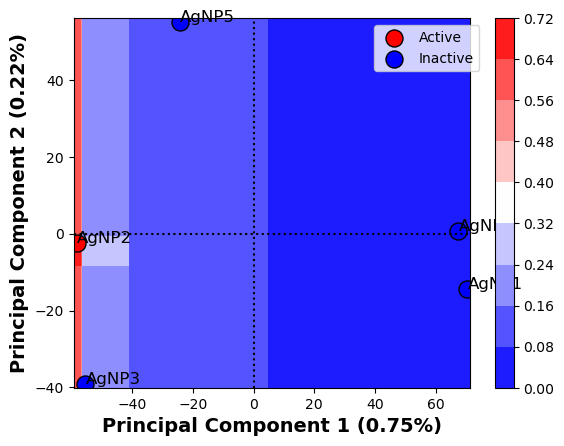

In [23]:
ax = plt.gca()
fig = plt.gcf()

x_PCA_selected = x_PCA[['PC1', 'PC2']] #<===========
model_RF.fit(x_PCA_selected, y_PCA)
X = x_PCA_selected
y = y_PCA
min1, max1 = X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1
min2, max2 = X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))

model_RF = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=2, random_state=42)

model_RF.fit(X, y)
yhat = model_RF.predict_proba(grid)
yhat = yhat[:, 0]
zz = yhat.reshape(xx.shape)
c = plt.contourf(xx, yy, zz, cmap='bwr')
plt.colorbar(c)


cvs = cross_val_score(model_RF, x_PCA_selected, y_PCA, cv=kf)
print('===================================')
print("Accuracy score")
print("For Random Forest model:")
print("Train set accuracy select = " + str(model_RF.score(X, y)))
print('===================================')
print(f'CV accuracy select is {cvs.mean()}')
print(f'sd CV is {cvs.std()}')
print('===================================')

plt.scatter(label1['PC1'], label1['PC2'], cmap='RdYlBu', s=150, label='Active', c='#FF0000', edgecolors='black')
plt.scatter(label2['PC1'], label2['PC2'], cmap='RdYlBu', s=150, label='Inactive',c='#0000FF', edgecolors='black')
plt.axvline(0, c='black', ls=':')
plt.axhline(0, c='black', ls=':')
plt.xlabel(f'Principal Component 1 ({pca_ratios[0]}%)', weight='bold', fontsize=14)
plt.ylabel(f'Principal Component 2 ({pca_ratios[1]}%)', weight='bold', fontsize=14)
plt.legend(bbox_to_anchor=(1.04,1))


namesActive = label1['PC1'].to_frame().index.to_list()
xs = label1['PC1'].to_frame()["PC1"].values
ys = label1['PC2'].to_frame()["PC2"].values

print("--------------")
print("active\n")
for name, x, y in zip(namesActive, xs, ys):

    print(name)
    print(f"{x} {y}")
    ax.annotate(name, (x, y), fontsize=12, color="#000000")


########################################################

namesActive = label2['PC1'].to_frame().index.to_list()
xs = label2['PC1'].to_frame()["PC1"].values
ys = label2['PC2'].to_frame()["PC2"].values

print("--------------")
print("active\n")
for name, x, y in zip(namesActive, xs, ys):

#     number = ds["number"].loc[name]

#     name2 = number

#     if name == "AgNP2":
#         x = x + (9.0)
#         y = y
    print(name)
    print(f"{x} {y}")
    ax.annotate(name, (x, y), fontsize=12, color="#000000")

#######################################################

plt.show()
fig.savefig('all_rf_model_two.pdf', dpi=500, bbox_inches='tight')
fig.savefig('all_rf_model_two.png', dpi=500, bbox_inches='tight', format="png")



